# **1: Nhận diện chữ số viết tay (MNIST Dataset)**

**Khai báo thư viện sử dụng**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import cv2
from matplotlib import pyplot as plt
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

**Load data**

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


**Chuẩn hóa dữ liệu input**

In [3]:
X_train_scaled = np.array(X_train)/255.
X_test_scaled = np.array(X_test)/255.

**Tách thành tập train và tập validation**

In [4]:
X_train_scaled, X_val_scaled,y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

**Chuẩn hóa dữ liệu output**

In [5]:
# OnehotVector output
encoder = OneHotEncoder()
encoder.fit(y_train.reshape(-1,1))
y_train = encoder.transform(y_train.reshape(-1,1)).toarray()
y_val = encoder.transform(y_val.reshape(-1,1)).toarray()
y_test = encoder.transform(y_test.reshape(-1,1)).toarray()

**Xây dựng mô hình CNN**

In [6]:
# CNN model
inp = Input(shape = (28,28,1)) # input shape
cnn = Conv2D(filters = 8, kernel_size = 3, activation='relu')(inp)
pooling = MaxPooling2D(pool_size=(2,2))(cnn)
drop = Dropout(0.2)(pooling)

cnn = Conv2D(filters = 16, kernel_size = 4, activation='relu')(drop)
pooling = MaxPooling2D(pool_size=(2,2))(cnn)
drop = Dropout(0.2)(pooling)

cnn = Conv2D(filters = 32, kernel_size = 4, activation='relu')(drop)
pooling = MaxPooling2D(pool_size=(2,2))(cnn)

f = Flatten()(pooling)

fc1 = Dense(units = 32, activation = 'relu')(f)
fc2 = Dense(units = 16, activation = 'relu')(fc1)
out = Dense(units = 10, activation = 'softmax')(fc2)

model = Model(inputs = inp, outputs = out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 8)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2064      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                        

**Huấn luyện mô hình ban đầu**

In [7]:
optimizer1 = tensorflow.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = optimizer1, loss='categorical_crossentropy',metrics = ['accuracy'])

history = model.fit(X_train_scaled,y_train,batch_size=64,
                    epochs = 10, validation_data = (X_val_scaled, y_val))

Epoch 1/10
750/750 [==============================] - 17s 7ms/step - loss: 0.5971 - accuracy: 0.7968 - val_loss: 0.1514 - val_accuracy: 0.9547
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.1719 - accuracy: 0.9471 - val_loss: 0.0904 - val_accuracy: 0.9747
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.1262 - accuracy: 0.9602 - val_loss: 0.0755 - val_accuracy: 0.9772
Epoch 4/10
750/750 [==============================] - 5s 6ms/step - loss: 0.1027 - accuracy: 0.9679 - val_loss: 0.0623 - val_accuracy: 0.9819
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0889 - accuracy: 0.9714 - val_loss: 0.0560 - val_accuracy: 0.9833
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0820 - accuracy: 0.9739 - val_loss: 0.0463 - val_accuracy: 0.9865
Epoch 7/10
750/750 [==============================] - 8s 10ms/step - loss: 0.0733 - accuracy: 0.9766 - val_loss: 0.0474 - val_accuracy: 0.9862
Epoc

**Trực quan hóa kết quả Accuracy và Loss trên tập Train và Test**

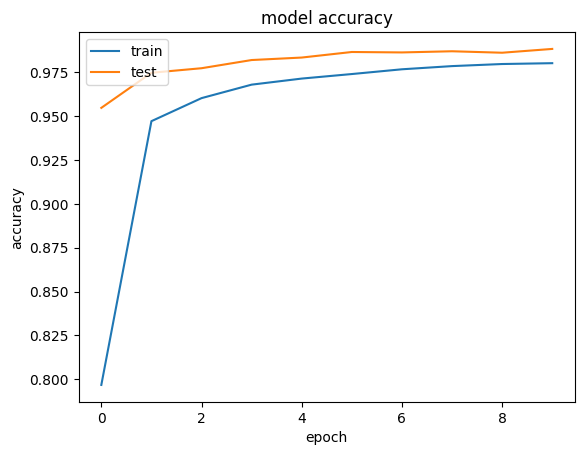

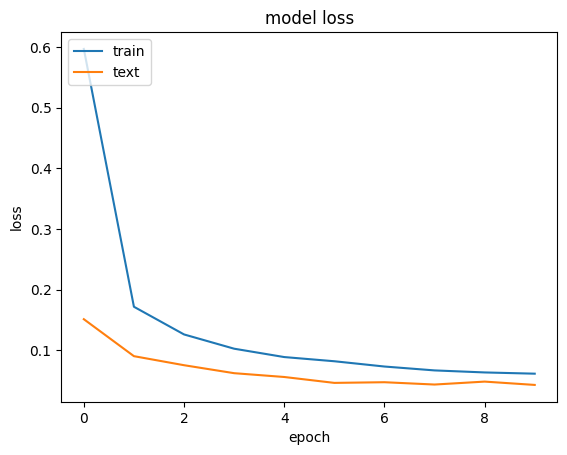

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','text'],loc='upper left')
plt.show()

**Lưu mô hình ban đầu, load mô hình đã lưu từ máy**

In [9]:
model.save('model1.h5')
from tensorflow.keras.models import load_model
model1 = load_model('/content/model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Load ảnh và sử dụng mô hình đã huấn luyện `model1.h5` để nhận diện 10 ảnh tự vẽ**

Processing image 0.png
1/1 [==============================] - 0s 173ms/step
Predicted class for 0.png: 0


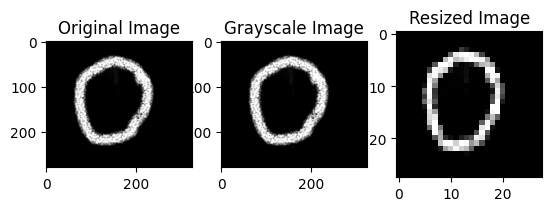

Processing image 1.png
1/1 [==============================] - 0s 20ms/step
Predicted class for 1.png: 1


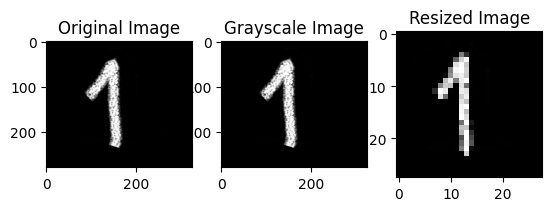

Processing image 2.png
1/1 [==============================] - 0s 19ms/step
Predicted class for 2.png: 2


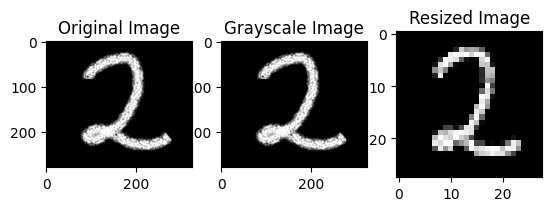

Processing image 3.png
1/1 [==============================] - 0s 19ms/step
Predicted class for 3.png: 3


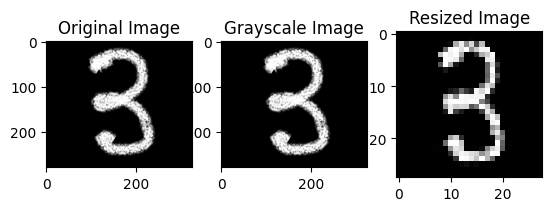

Processing image 4.png
1/1 [==============================] - 0s 17ms/step
Predicted class for 4.png: 4


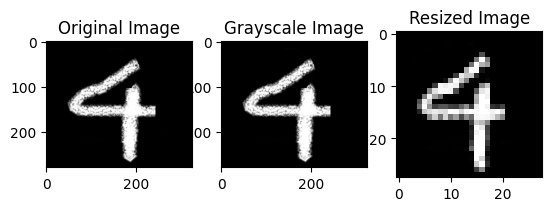

Processing image 5.png
1/1 [==============================] - 0s 17ms/step
Predicted class for 5.png: 5


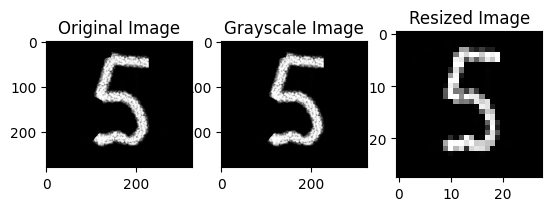

Processing image 6.png
1/1 [==============================] - 0s 18ms/step
Predicted class for 6.png: 6


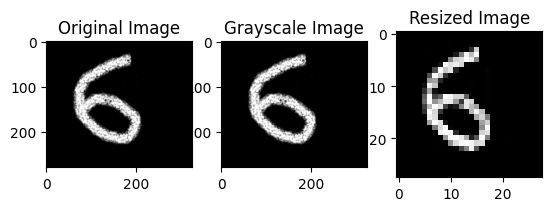

Processing image 7.png
1/1 [==============================] - 0s 21ms/step
Predicted class for 7.png: 7


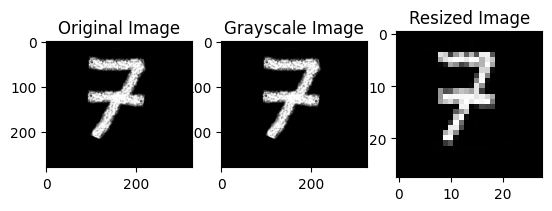

Processing image 8.png
1/1 [==============================] - 0s 19ms/step
Predicted class for 8.png: 8


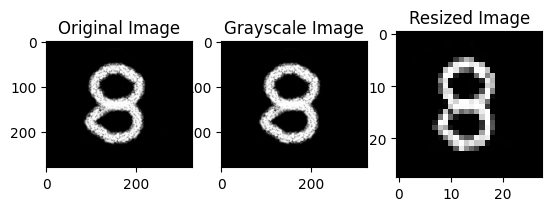

Processing image 9.png
1/1 [==============================] - 0s 20ms/step
Predicted class for 9.png: 9


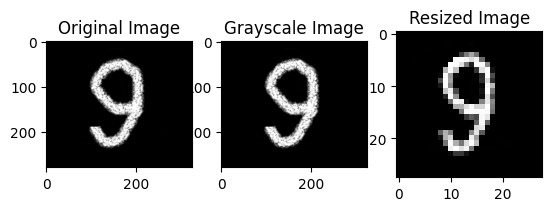

In [10]:
import cv2

for i in range(10):
    img_path = f'/content/{i}.png'  # Construct the path for each image
    img = cv2.imread(img_path)

    if img is not None:
        print(f"Processing image {i}.png")

        # Display original image
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')

        # Convert to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Display grayscale image
        plt.subplot(1, 3, 2)
        plt.imshow(gray_img, cmap='gray')
        plt.title('Grayscale Image')

        # Resize to 28x28
        img_resized = cv2.resize(gray_img, (28, 28))

        # Display resized image
        plt.subplot(1, 3, 3)
        plt.imshow(img_resized, cmap='gray')
        plt.title('Resized Image')

        # Preprocess image for prediction
        img_scaled = np.array([img_resized / 255.])

        # Make prediction using the model
        y_hat = model1.predict(img_scaled)

        # Get the predicted class
        predicted_class = np.argmax(y_hat)
        print(f"Predicted class for {i}.png: {predicted_class}")

        plt.show()  # Show the plotted images for each iteration
    else:
        print(f"Could not find image {i}.png")


**Tính y dự đoán từ mô hình ban đầu đã lưu**

In [11]:
y_hat = model1.predict(X_test_scaled)

313/313 [==============================] - 1s 2ms/step


In [12]:
print(y_hat.shape)
print(y_test.shape)

(10000, 10)
(10000, 10)


**Lấy argmax của y dự đoán và y test**

In [13]:
y_test = np.argmax(y_test, axis=1)
y_hat = np.argmax(y_hat, axis=1)

### **Sử dụng classification_report trong thư viện Sklearn đánh giá kết quả mô hình ban đầu dựa trên kết quả dự đoán tập test**

In [14]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2', '3','4','5','6','7','8','9']
print(classification_report(y_test, y_hat,target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### **Sử dụng Confusion_matrix trong thư viện Sklearn biểu diễn kết quả dự đoán trên tập test**

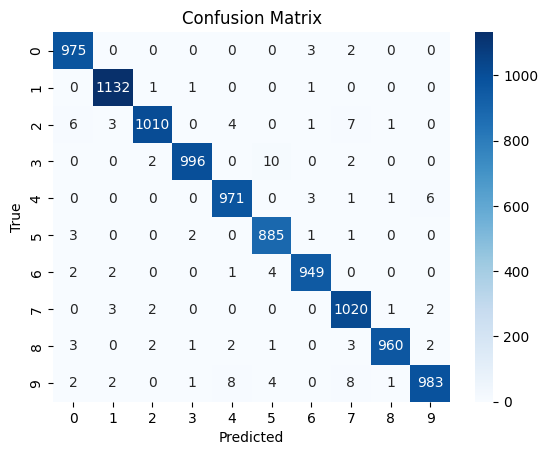

In [15]:
import sklearn.metrics
import seaborn as sn

# Tạo confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test, y_hat)

# Vẽ confusion matrix
plt.figure()
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Accuracy**

In [16]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test, y_hat)
print('Accuracy:', accuracy1)

Accuracy: 0.9881


**Từ đây ta thấy rằng khi ta train dữ liệu không có nhiễu để dự đoán dữ liệu không có nhiễu thì độ chính xác ra kết quả gần 99%**

# **2: Sử dụng tập dữ liệu MNIST, thêm nhiễu vào trong ảnh như hình sau:**

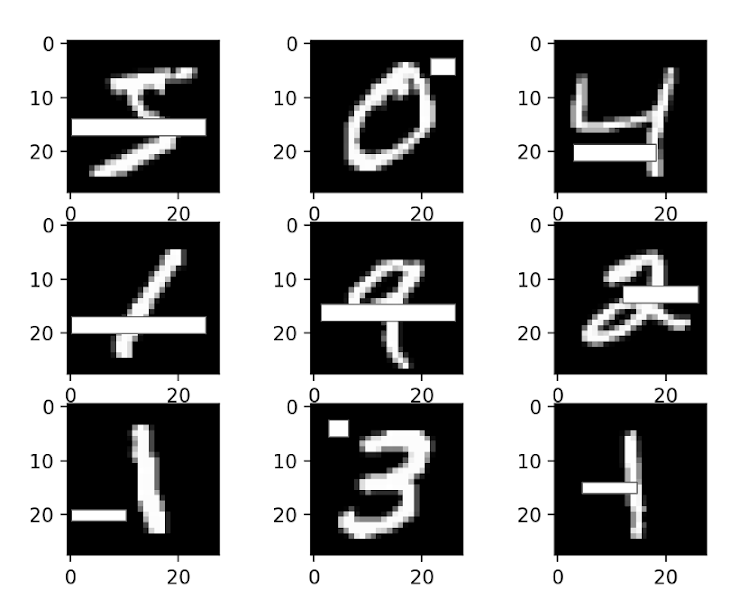

In [17]:
import random

**Chuẩn bị data, ví dụ vẽ chèn nhiễu vào dữ liệu**

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


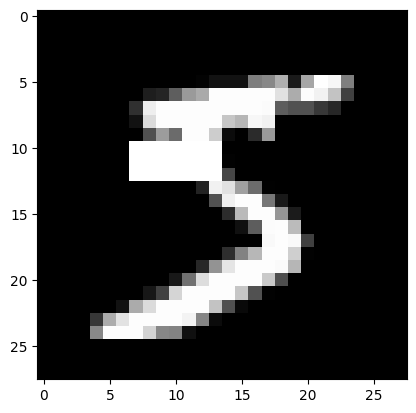

In [110]:
(X_train1, y_train1), (X_test1, y_test1) = mnist.load_data()
print(y_train[0])
x_start = random.randint(2,17)
y_start = random.randint(2,25)
x_end = random.randint(13,25)
y_end = random.randint(2,25)
thickness = 1
# cv2.rectangle(X_train1[0],(x_start,y_start),(x_end,y_start),(255,255,255),thickness)
cv2.line(X_train1[0],(x_start,y_start - 1),(x_end,y_start - 1),(255,255,255),thickness)
cv2.line(X_train1[0],(x_start,y_start),(x_end,y_start),(255,255,255),thickness)
cv2.line(X_train1[0],(x_start,y_start + 1),(x_end,y_start + 1),(255,255,255),thickness)
# cv2.line(X_train1[0],(x_start,y_start + 2),(x_end,y_start + 2),(255,255,255),thickness)
plt.imshow(X_train1[0],cmap = 'gray')

**Vẽ chèn nhiễu vào tất cả ảnh trong tập MNIST ở tập train và tập test**

In [111]:
for i in range (len(X_train1)):
  x_start = random.randint(2,17)
  y_start = random.randint(2,25)
  x_end = random.randint(13,25)
  y_end = random.randint(2,25)
  thickness = 1
  # cv2.rectangle(X_train1[i],(x_start,y_start),(x_end,y_start),(230,230,230),thickness)
  cv2.line(X_train1[i],(x_start,y_start-1),(x_end,y_start-1),(255,255,255),thickness)
  cv2.line(X_train1[i],(x_start,y_start),(x_end,y_start),(255,255,255),thickness)
  cv2.line(X_train1[i],(x_start,y_start+1),(x_end,y_start+1),(255,255,255),thickness)
  # cv2.line(X_train1[i],(x_start,y_start+2),(x_end,y_start+2),(255,255,255),thickness)

In [112]:
for i in range (len(X_test1)):
  x_start = random.randint(2,17)
  y_start = random.randint(2,25)
  x_end = random.randint(13,25)
  y_end = random.randint(2,25)
  thickness = 1
  # plt.subplot(3,3,i)
  # cv2.rectangle(X_test1[i],(x_start,y_start),(x_end,y_start),(255,255,255),thickness)
  cv2.line(X_test1[i],(x_start,y_start-1),(x_end,y_start-1),(255,255,255),thickness)
  cv2.line(X_test1[i],(x_start,y_start),(x_end,y_start),(255,255,255),thickness)
  cv2.line(X_test1[i],(x_start,y_start+1),(x_end,y_start+1),(255,255,255),thickness)
  # cv2.line(X_test1[i],(x_start,y_start+2),(x_end,y_start+2),(255,255,255),thickness)
  # plt.imshow(X_train[i], cmap = 'gray')

**Ví dụ 9 ảnh đầu tiên đã được chèn nhiễu**

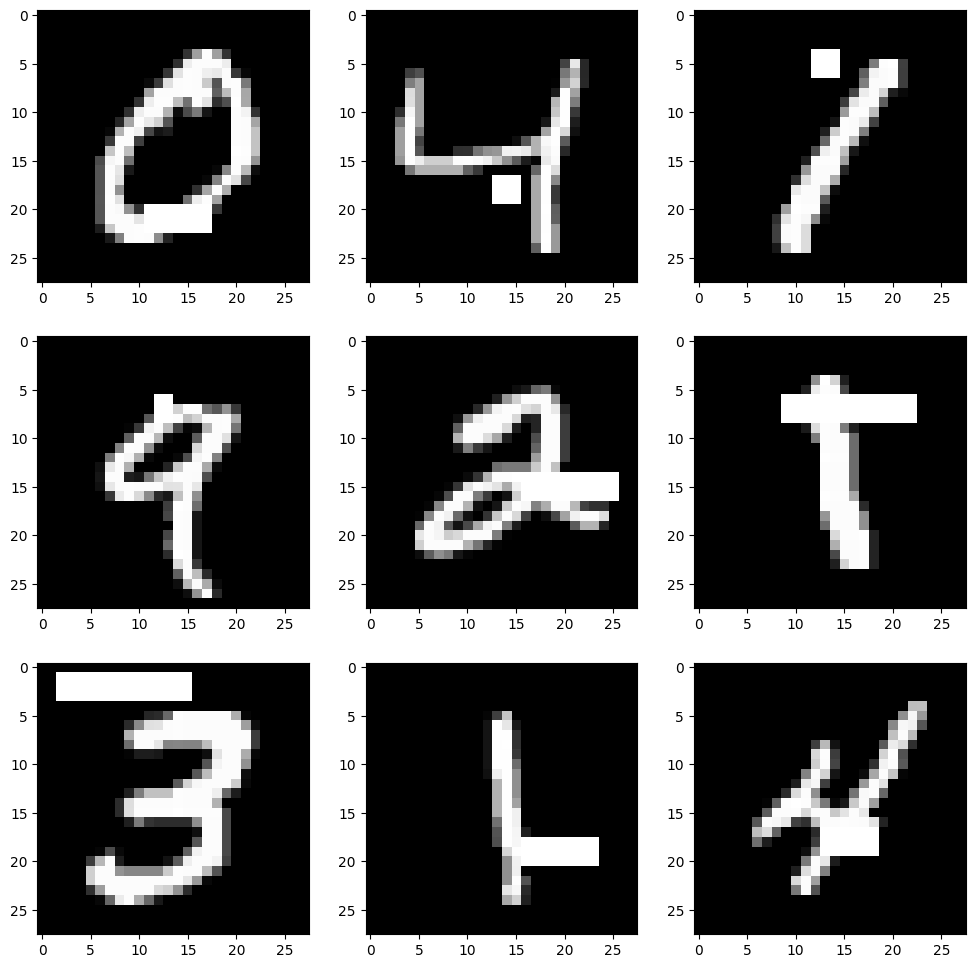

In [113]:
plt.figure(figsize=(12,12))
for i in range (1,10):
  plt.subplot(3,3,i)
  # cv2.rectangle(X_train[i],(x_start,y_start),(x_end,y_start),(255,255,255),thickness)
  plt.imshow(X_train1[i], cmap = 'gray')

**Chuẩn hoá input từ ảnh có nhiễu**

In [114]:
X_train_scaled1 = np.array(X_train1)/255.
X_test_scaled1 = np.array(X_test1)/255.

In [115]:
X_train_scaled1, X_val_scaled1,y_train1, y_val1 = train_test_split(X_train_scaled1, y_train1, test_size=0.2, random_state=42)

**Chuẩn hoá output**

In [116]:
# OnehotVector output
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(y_train1.reshape(-1,1))
y_train1 = encoder.transform(y_train1.reshape(-1,1)).toarray()
y_val1 = encoder.transform(y_val1.reshape(-1,1)).toarray()
y_test1 = encoder.transform(y_test1.reshape(-1,1)).toarray()

**Xây dựng mô hình CNN**

In [117]:
# CNN model
inp = Input(shape = (28,28,1)) # input shape
cnn = Conv2D(filters = 8, kernel_size = 3, activation='relu')(inp)
pooling = MaxPooling2D(pool_size=(2,2))(cnn)
drop = Dropout(0.2)(pooling)

cnn = Conv2D(filters = 16, kernel_size = 4, activation='relu')(drop)
pooling = MaxPooling2D(pool_size=(2,2))(cnn)
drop = Dropout(0.2)(pooling)

cnn = Conv2D(filters = 32, kernel_size = 4, activation='relu')(drop)
pooling = MaxPooling2D(pool_size=(2,2))(cnn)

f = Flatten()(pooling)

fc1 = Dense(units = 32, activation = 'relu')(f)
fc2 = Dense(units = 16, activation = 'relu')(fc1)
out = Dense(units = 10, activation = 'softmax')(fc2)

model = Model(inputs = inp, outputs = out)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 13, 13, 8)         0         
 ng2D)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 13, 13, 8)         0         
                                                                 
 conv2d_19 (Conv2D)          (None, 10, 10, 16)        2064      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 5, 5, 16)          0         
 ng2D)                                                     

**Train dữ liệu từ tập train có nhiễu và tập validation không có nhiễu**

In [118]:
optimizer1 = tensorflow.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = optimizer1, loss='categorical_crossentropy',metrics = ['accuracy'])

history = model.fit(X_train_scaled1,y_train1,batch_size=64,
                    epochs = 10, validation_data = (X_val_scaled1, y_val1))

Epoch 1/10
750/750 [==============================] - 6s 5ms/step - loss: 0.9185 - accuracy: 0.6878 - val_loss: 0.3707 - val_accuracy: 0.8776
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4005 - accuracy: 0.8672 - val_loss: 0.2606 - val_accuracy: 0.9156
Epoch 3/10
750/750 [==============================] - 4s 6ms/step - loss: 0.2993 - accuracy: 0.9009 - val_loss: 0.1944 - val_accuracy: 0.9358
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2462 - accuracy: 0.9195 - val_loss: 0.1636 - val_accuracy: 0.9498
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2115 - accuracy: 0.9316 - val_loss: 0.1438 - val_accuracy: 0.9528
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.1898 - accuracy: 0.9388 - val_loss: 0.1266 - val_accuracy: 0.9598
Epoch 7/10
750/750 [==============================] - 5s 6ms/step - loss: 0.1689 - accuracy: 0.9452 - val_loss: 0.1185 - val_accuracy: 0.9627
Epoch 

**Trực quan hoá kết quả train và validation**

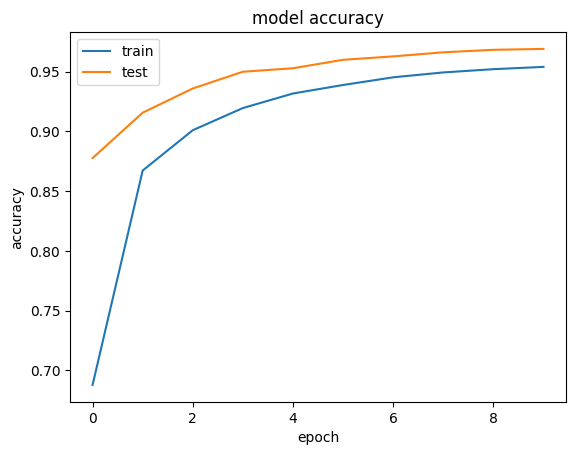

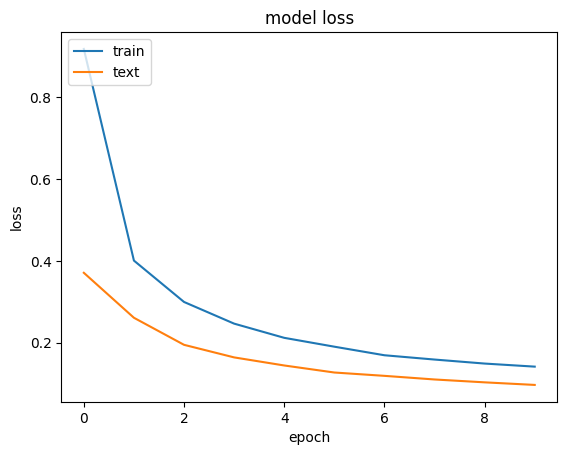

In [119]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','text'],loc='upper left')
plt.show()

**Lưu và load model 2**

In [120]:
model.save('model2.h5')
from tensorflow.keras.models import load_model
model2 = load_model('/content/model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Dùng `model2.h5` test ví dụ 10 ảnh tự vẽ**

Processing image 0.png
1/1 [==============================] - 0s 77ms/step
Predicted class for 0.png: 0


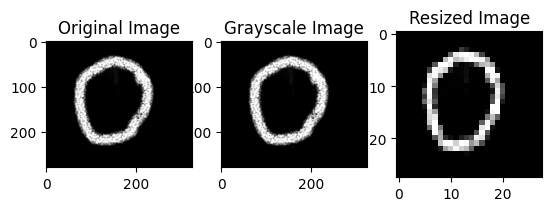

Processing image 1.png
1/1 [==============================] - 0s 17ms/step
Predicted class for 1.png: 1


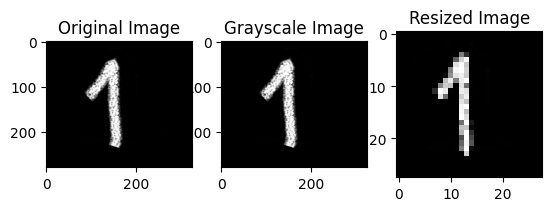

Processing image 2.png
1/1 [==============================] - 0s 18ms/step
Predicted class for 2.png: 2


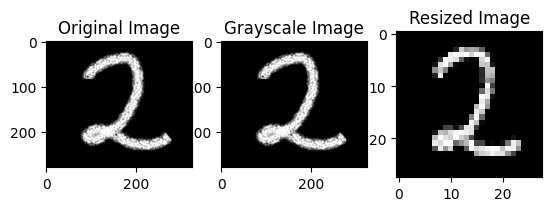

Processing image 3.png
1/1 [==============================] - 0s 17ms/step
Predicted class for 3.png: 3


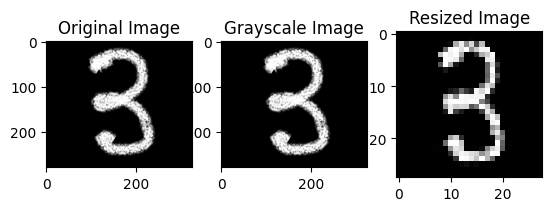

Processing image 4.png
1/1 [==============================] - 0s 19ms/step
Predicted class for 4.png: 9


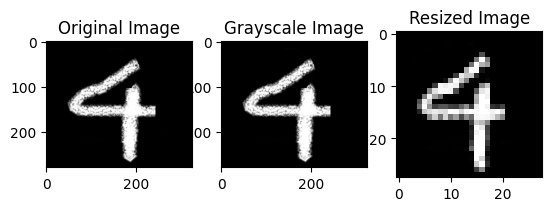

Processing image 5.png
1/1 [==============================] - 0s 19ms/step
Predicted class for 5.png: 5


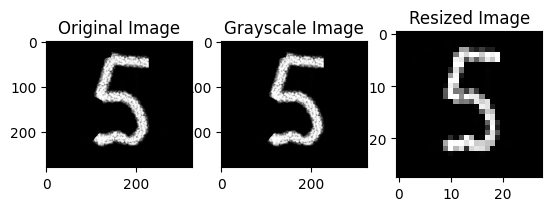

Processing image 6.png
1/1 [==============================] - 0s 17ms/step
Predicted class for 6.png: 6


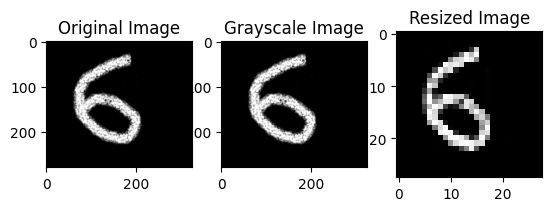

Processing image 7.png
1/1 [==============================] - 0s 25ms/step
Predicted class for 7.png: 1


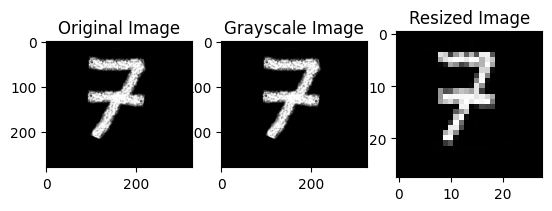

Processing image 8.png
1/1 [==============================] - 0s 20ms/step
Predicted class for 8.png: 8


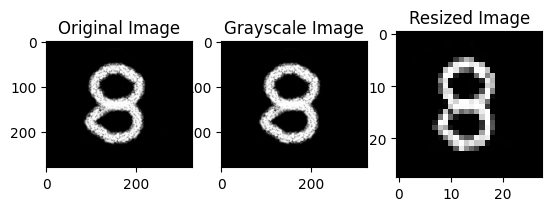

Processing image 9.png
1/1 [==============================] - 0s 18ms/step
Predicted class for 9.png: 9


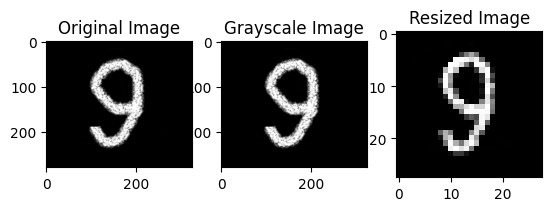

In [121]:
import cv2

for i in range(10):
    img_path = f'/content/{i}.png'  # Construct the path for each image
    img = cv2.imread(img_path)

    if img is not None:
        print(f"Processing image {i}.png")

        # Display original image
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')

        # Convert to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Display grayscale image
        plt.subplot(1, 3, 2)
        plt.imshow(gray_img, cmap='gray')
        plt.title('Grayscale Image')

        # Resize to 28x28
        img_resized = cv2.resize(gray_img, (28, 28))

        # Display resized image
        plt.subplot(1, 3, 3)
        plt.imshow(img_resized, cmap='gray')
        plt.title('Resized Image')

        # Preprocess image for prediction
        img_scaled = np.array([img_resized / 255.])

        # Make prediction using the model
        y_hat1 = model2.predict(img_scaled)

        # Get the predicted class
        predicted_class = np.argmax(y_hat1)
        print(f"Predicted class for {i}.png: {predicted_class}")

        plt.show()  # Show the plotted images for each iteration
    else:
        print(f"Could not find image {i}.png")


**Tính y dự đoán tập test không có nhiễu dùng `model2.h5`**

In [122]:
y_hat1 = model2.predict(X_test_scaled)

313/313 [==============================] - 1s 3ms/step


**Chuẩn hoá y dự đoán và y thật**

In [123]:
y_test1 = np.argmax(y_test1, axis=1)
y_hat1 = np.argmax(y_hat1, axis=1)

**Đánh giá khả năng dự đoán của tập MNIST không chèn nhiễu**

In [124]:
target_names = ['0', '1', '2', '3','4','5','6','7','8','9']
print(classification_report(y_test1, y_hat1,target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.97      1.00      0.98      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.97      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Confusion matrix**

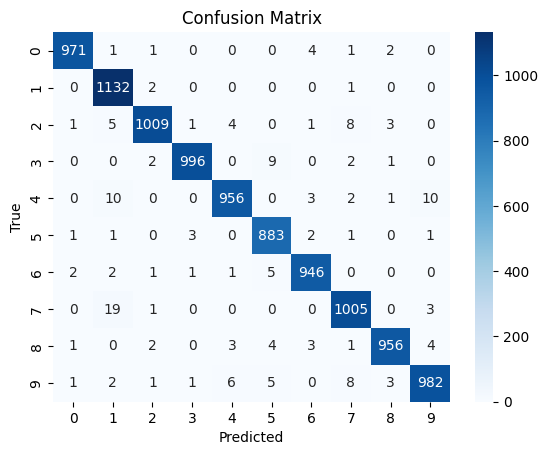

In [125]:
import sklearn.metrics
import seaborn as sn

# Tạo confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test1, y_hat1)

# Vẽ confusion matrix
plt.figure()
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Accuracy**

In [126]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test1, y_hat1)
print('Accuracy:', accuracy1)

Accuracy: 0.9836


**Từ đây ta thấy rằng khi ta train dữ liệu có 1 đường thẳng nhiễu để dự đoán dữ liệu không có nhiễu thì độ chính xác ra kết quả gần 98%**

**Tính y dự đoán tập test có 1 đường thẳng nhiễu dùng `model1.h5` và chuẩn hoá**

In [127]:
y_hat2 = model1.predict(X_test_scaled1)

313/313 [==============================] - 1s 3ms/step


In [128]:
y_hat2 = np.argmax(y_hat2, axis=1)

**Đánh giá khả năng dự đoán của tập MNIST chèn 1 đường thẳng nhiễu**

In [129]:
target_names = ['0', '1', '2', '3','4','5','6','7','8','9']
print(classification_report(y_test1, y_hat2,target_names=target_names))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       980
           1       0.97      0.57      0.72      1135
           2       0.85      0.92      0.88      1032
           3       0.91      0.92      0.91      1010
           4       0.72      0.79      0.75       982
           5       0.85      0.92      0.88       892
           6       0.92      0.87      0.90       958
           7       0.71      0.85      0.77      1028
           8       0.87      0.91      0.89       974
           9       0.84      0.84      0.84      1009

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



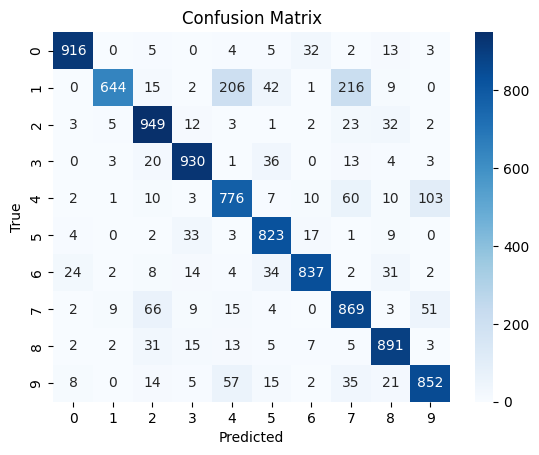

In [130]:
import sklearn.metrics
import seaborn as sn

# Tạo confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test1, y_hat2)

# Vẽ confusion matrix
plt.figure()
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Đánh giá khả năng dự đoán của tập MNIST đã chèn nhiễu**

In [131]:
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(y_test1, y_hat2)
print('Accuracy:', accuracy2)

Accuracy: 0.8487


**Từ đây ta thấy rằng khi ta train dữ liệu không có nhiễu để dự đoán dữ liệu có 1 đường thẳng nhiễu thì độ chính xác ra kết quả 85%**

## **3. Thêm 2 đường thẳng nhiễu vào tập ảnh MNIST**

**Trích xuất dữ liệu, thêm 2 đường thẳng nhiễu vào ảnh làm ví dụ**

5


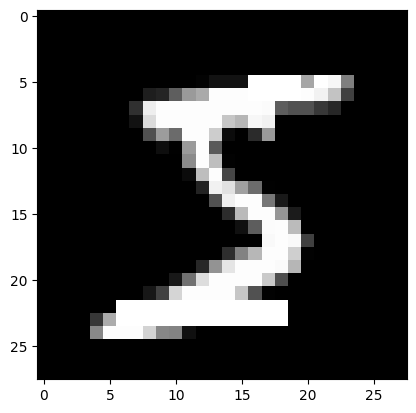

In [152]:
(X_train2, y_train2), (X_test2, y_test2) = mnist.load_data()
print(y_train2[0])
x_start = random.randint(2,17)
y_start = random.randint(2,13)
x_end = random.randint(13,25)
y_end = random.randint(2,13)
x_start1 = random.randint(2,17)
y_start1 = random.randint(17,25)
x_end1 = random.randint(13,25)
y_end1 = random.randint(17,25)
thickness = 1
# cv2.rectangle(X_train1[0],(x_start,y_start),(x_end,y_start),(255,255,255),thickness)
# cv2.line(X_train2[0],(x_start,y_start - 1),(x_end,y_start - 1),(255,255,255),thickness)
cv2.line(X_train2[0],(x_start,y_start),(x_end,y_start),(255,255,255),thickness)
cv2.line(X_train2[0],(x_start,y_start + 1),(x_end,y_start + 1),(255,255,255),thickness)
# cv2.line(X_train2[0],(x_start1,y_start1 - 1),(x_end1,y_start1 - 1),(255,255,255),thickness)
cv2.line(X_train2[0],(x_start1,y_start1),(x_end1,y_start1),(255,255,255),thickness)
cv2.line(X_train2[0],(x_start1,y_start1 + 1),(x_end1,y_start1 + 1),(255,255,255),thickness)
plt.imshow(X_train2[0],cmap = 'gray')

**Thêm nhiễu vào tập train và tập test**

In [153]:
for i in range (len(X_train2)):
  x_start = random.randint(2,17)
  y_start = random.randint(2,13)
  x_end = random.randint(13,25)
  y_end = random.randint(2,13)
  x_start1 = random.randint(2,17)
  y_start1 = random.randint(17,25)
  x_end1 = random.randint(13,25)
  y_end1 = random.randint(17,25)
  thickness = 1
  # cv2.line(X_train2[i],(x_start,y_start - 1),(x_end,y_start - 1),(255,255,255),thickness)
  cv2.line(X_train2[i],(x_start,y_start),(x_end,y_start),(255,255,255),thickness)
  cv2.line(X_train2[i],(x_start,y_start + 1),(x_end,y_start + 1),(255,255,255),thickness)
  # cv2.line(X_train2[i],(x_start1,y_start1 - 1),(x_end1,y_start1 - 1),(255,255,255),thickness)
  cv2.line(X_train2[i],(x_start1,y_start1),(x_end1,y_start1),(255,255,255),thickness)
  cv2.line(X_train2[i],(x_start1,y_start1 + 1),(x_end1,y_start1 + 1),(255,255,255),thickness)

In [154]:
for i in range (len(X_test2)):
  x_start = random.randint(2,17)
  y_start = random.randint(2,13)
  x_end = random.randint(13,25)
  y_end = random.randint(2,13)
  x_start1 = random.randint(2,17)
  y_start1 = random.randint(17,25)
  x_end1 = random.randint(13,25)
  y_end1 = random.randint(17,25)
  thickness = 1
  # cv2.line(X_test2[i],(x_start,y_start - 1),(x_end,y_start - 1),(255,255,255),thickness)
  cv2.line(X_test2[i],(x_start,y_start),(x_end,y_start),(255,255,255),thickness)
  cv2.line(X_test2[i],(x_start,y_start + 1),(x_end,y_start + 1),(255,255,255),thickness)
  # cv2.line(X_test2[i],(x_start1,y_start1 - 1),(x_end1,y_start1 - 1),(255,255,255),thickness)
  cv2.line(X_test2[i],(x_start1,y_start1),(x_end1,y_start1),(255,255,255),thickness)
  cv2.line(X_test2[i],(x_start1,y_start1 + 1),(x_end1,y_start1 + 1),(255,255,255),thickness)

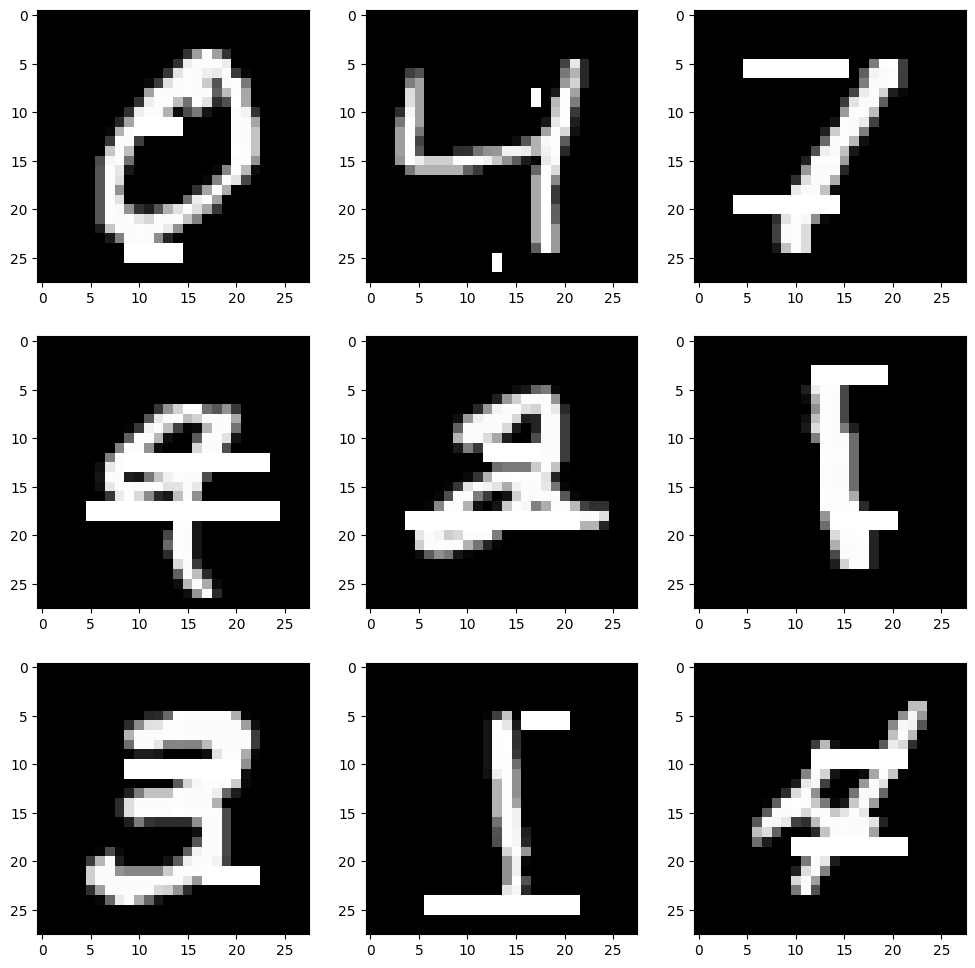

In [155]:
plt.figure(figsize=(12,12))
for i in range (1,10):
  plt.subplot(3,3,i)
  # cv2.rectangle(X_train[i],(x_start,y_start),(x_end,y_start),(255,255,255),thickness)
  plt.imshow(X_train2[i], cmap = 'gray')

**Chuẩn hoá input, output**

In [156]:
X_train_scaled2 = np.array(X_train2)/255.
X_test_scaled2 = np.array(X_test2)/255.
X_train_scaled2, X_val_scaled2,y_train2, y_val2 = train_test_split(X_train_scaled2, y_train2, test_size=0.2, random_state=42)
# OnehotVector output
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(y_train2.reshape(-1,1))
y_train2 = encoder.transform(y_train2.reshape(-1,1)).toarray()
y_val2 = encoder.transform(y_val2.reshape(-1,1)).toarray()
y_test2 = encoder.transform(y_test2.reshape(-1,1)).toarray()

**Mạng CNN**

In [157]:
# CNN model
inp = Input(shape = (28,28,1)) # input shape
cnn = Conv2D(filters = 8, kernel_size = 3, activation='relu')(inp)
pooling = MaxPooling2D(pool_size=(2,2))(cnn)
drop = Dropout(0.2)(pooling)

cnn = Conv2D(filters = 16, kernel_size = 4, activation='relu')(drop)
pooling = MaxPooling2D(pool_size=(2,2))(cnn)
drop = Dropout(0.2)(pooling)

cnn = Conv2D(filters = 32, kernel_size = 4, activation='relu')(drop)
pooling = MaxPooling2D(pool_size=(2,2))(cnn)

f = Flatten()(pooling)

fc1 = Dense(units = 32, activation = 'relu')(f)
fc2 = Dense(units = 16, activation = 'relu')(fc1)
out = Dense(units = 10, activation = 'softmax')(fc2)

model = Model(inputs = inp, outputs = out)
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 13, 13, 8)         0         
 ng2D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 13, 13, 8)         0         
                                                                 
 conv2d_25 (Conv2D)          (None, 10, 10, 16)        2064      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 5, 5, 16)          0         
 ng2D)                                                     

**Train dữ liệu**

In [158]:
optimizer1 = tensorflow.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = optimizer1, loss='categorical_crossentropy',metrics = ['accuracy'])

history = model.fit(X_train_scaled2,y_train2,batch_size=64,
                    epochs = 10, validation_data = (X_val_scaled2, y_val2))

Epoch 1/10
750/750 [==============================] - 6s 6ms/step - loss: 0.9029 - accuracy: 0.6891 - val_loss: 0.3136 - val_accuracy: 0.9019
Epoch 2/10
750/750 [==============================] - 5s 6ms/step - loss: 0.3298 - accuracy: 0.8915 - val_loss: 0.2097 - val_accuracy: 0.9314
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2464 - accuracy: 0.9178 - val_loss: 0.1645 - val_accuracy: 0.9485
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2078 - accuracy: 0.9309 - val_loss: 0.1419 - val_accuracy: 0.9560
Epoch 5/10
750/750 [==============================] - 4s 6ms/step - loss: 0.1877 - accuracy: 0.9402 - val_loss: 0.1336 - val_accuracy: 0.9588
Epoch 6/10
750/750 [==============================] - 5s 6ms/step - loss: 0.1682 - accuracy: 0.9448 - val_loss: 0.1066 - val_accuracy: 0.9675
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.1568 - accuracy: 0.9473 - val_loss: 0.0984 - val_accuracy: 0.9705
Epoch 

**Trực quan hoá kết quả vừa train**

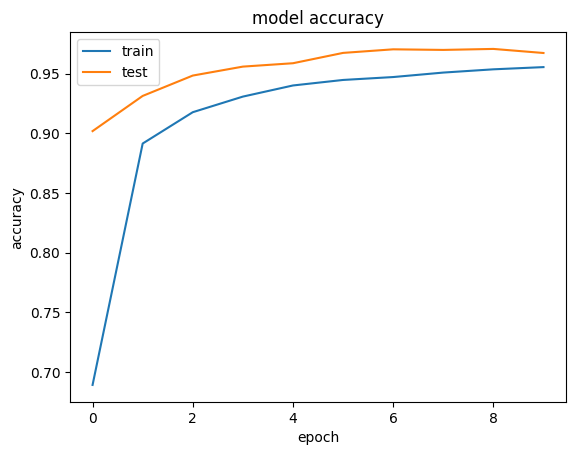

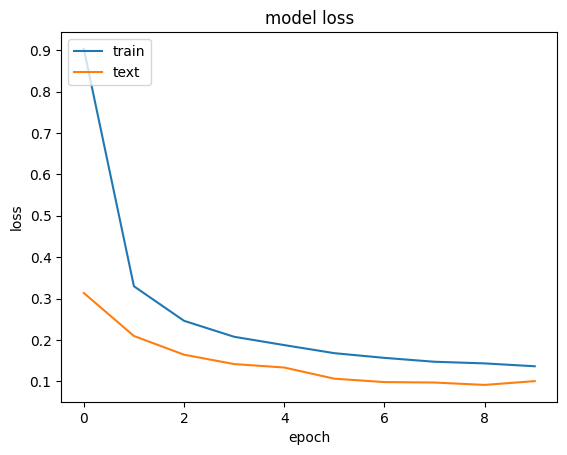

In [159]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','text'],loc='upper left')
plt.show()

**Lưu và load dữ liệu vào file `model3.h5`**

In [160]:
model.save('model3.h5')
from tensorflow.keras.models import load_model
model3 = load_model('/content/model3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Dùng `model3.h5` test ví dụ 10 ảnh tự vẽ**

Processing image 0.png
1/1 [==============================] - 0s 81ms/step
Predicted class for 0.png: 0


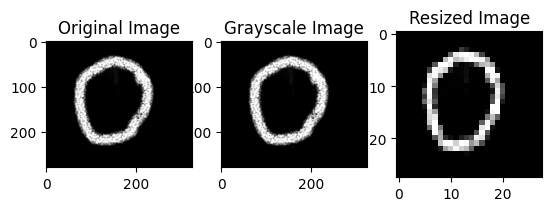

Processing image 1.png
1/1 [==============================] - 0s 19ms/step
Predicted class for 1.png: 1


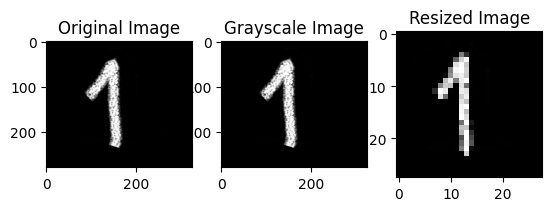

Processing image 2.png
1/1 [==============================] - 0s 17ms/step
Predicted class for 2.png: 2


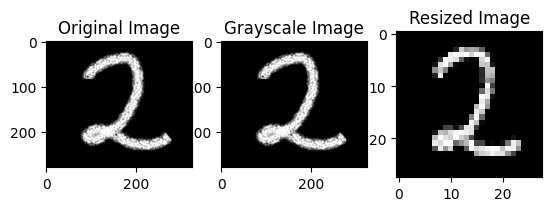

Processing image 3.png
1/1 [==============================] - 0s 18ms/step
Predicted class for 3.png: 3


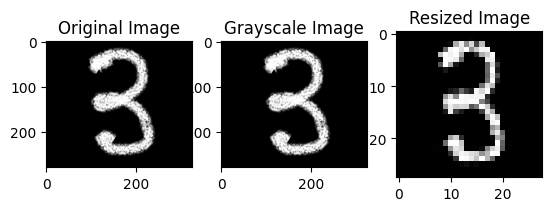

Processing image 4.png
1/1 [==============================] - 0s 19ms/step
Predicted class for 4.png: 9


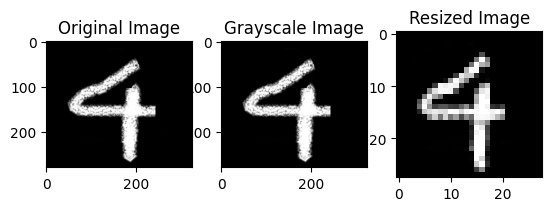

Processing image 5.png
1/1 [==============================] - 0s 16ms/step
Predicted class for 5.png: 5


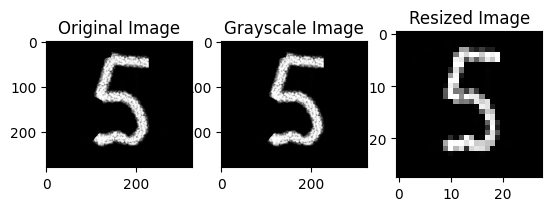

Processing image 6.png
1/1 [==============================] - 0s 17ms/step
Predicted class for 6.png: 6


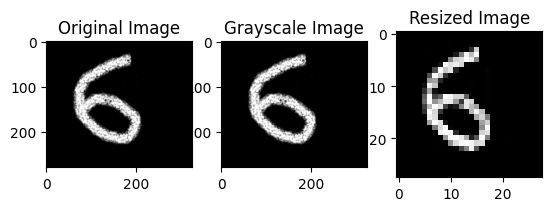

Processing image 7.png
1/1 [==============================] - 0s 19ms/step
Predicted class for 7.png: 1


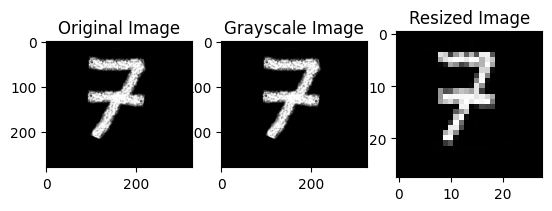

Processing image 8.png
1/1 [==============================] - 0s 22ms/step
Predicted class for 8.png: 8


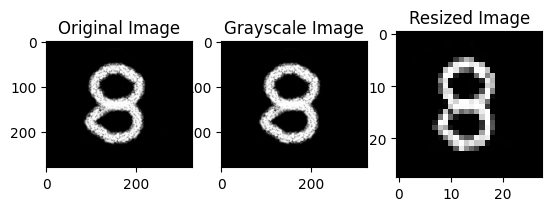

Processing image 9.png
1/1 [==============================] - 0s 31ms/step
Predicted class for 9.png: 9


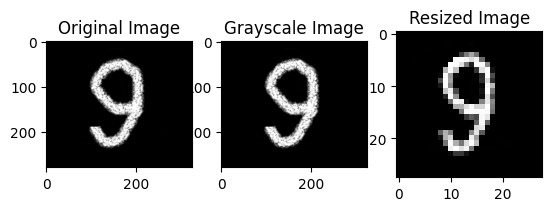

In [161]:
import cv2

for i in range(10):
    img_path = f'/content/{i}.png'  # Construct the path for each image
    img = cv2.imread(img_path)

    if img is not None:
        print(f"Processing image {i}.png")

        # Display original image
        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')

        # Convert to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Display grayscale image
        plt.subplot(1, 3, 2)
        plt.imshow(gray_img, cmap='gray')
        plt.title('Grayscale Image')

        # Resize to 28x28
        img_resized = cv2.resize(gray_img, (28, 28))

        # Display resized image
        plt.subplot(1, 3, 3)
        plt.imshow(img_resized, cmap='gray')
        plt.title('Resized Image')

        # Preprocess image for prediction
        img_scaled = np.array([img_resized / 255.])

        # Make prediction using the model
        y_hat3 = model3.predict(img_scaled)

        # Get the predicted class
        predicted_class = np.argmax(y_hat3)
        print(f"Predicted class for {i}.png: {predicted_class}")

        plt.show()  # Show the plotted images for each iteration
    else:
        print(f"Could not find image {i}.png")


**Tính y dự đoán tập test không có nhiễu dùng `model3.h5`**

In [162]:
y_hat3 = model3.predict(X_test_scaled)

313/313 [==============================] - 1s 3ms/step


**Chuẩn hoá y dự đoán và y thật**

In [163]:
y_test2 = np.argmax(y_test2, axis=1)
y_hat3 = np.argmax(y_hat3, axis=1)

**Đánh giá khả năng dự đoán của tập MNIST không chèn nhiễu**

In [164]:
target_names = ['0', '1', '2', '3','4','5','6','7','8','9']
print(classification_report(y_test2, y_hat3,target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.99      0.97      0.98      1032
           3       1.00      0.96      0.98      1010
           4       0.98      0.97      0.97       982
           5       0.94      0.99      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.99      0.97      0.98       974
           9       0.95      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Confusion matrix**

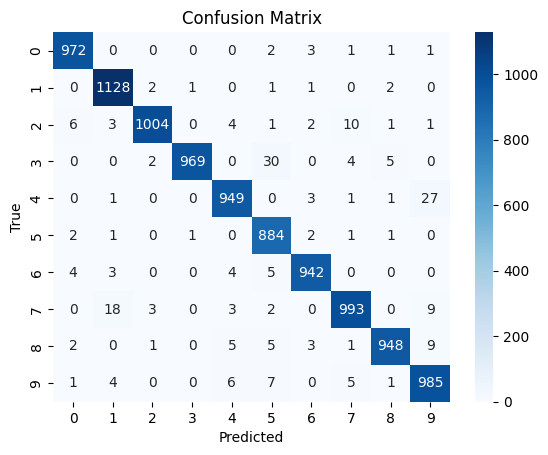

In [165]:
import sklearn.metrics
import seaborn as sn

# Tạo confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test2, y_hat3)

# Vẽ confusion matrix
plt.figure()
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Accuracy**

In [166]:
from sklearn.metrics import accuracy_score
accuracy3 = accuracy_score(y_test2, y_hat3)
print('Accuracy:', accuracy3)

Accuracy: 0.9774


**Từ đây ta thấy rằng khi ta train dữ liệu có 2 đường thẳng nhiễu để dự đoán dữ liệu không có nhiễu thì độ chính xác ra kết quả gần 98%**

**Tính y dự đoán tập test có 2 đường thẳng nhiễu dùng `model1.h5` và chuẩn hoá**

In [167]:
y_hat4 = model1.predict(X_test_scaled2)

313/313 [==============================] - 1s 3ms/step


In [168]:
y_hat4 = np.argmax(y_hat4, axis=1)

**Đánh giá khả năng dự đoán của tập MNIST chèn 2 đường thẳng nhiễu**

In [169]:
target_names = ['0', '1', '2', '3','4','5','6','7','8','9']
print(classification_report(y_test2, y_hat4,target_names=target_names))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       980
           1       0.90      0.46      0.61      1135
           2       0.62      0.88      0.72      1032
           3       0.75      0.90      0.82      1010
           4       0.74      0.52      0.61       982
           5       0.68      0.91      0.78       892
           6       0.93      0.73      0.82       958
           7       0.64      0.75      0.69      1028
           8       0.76      0.82      0.79       974
           9       0.76      0.69      0.73      1009

    accuracy                           0.75     10000
   macro avg       0.77      0.76      0.75     10000
weighted avg       0.77      0.75      0.75     10000



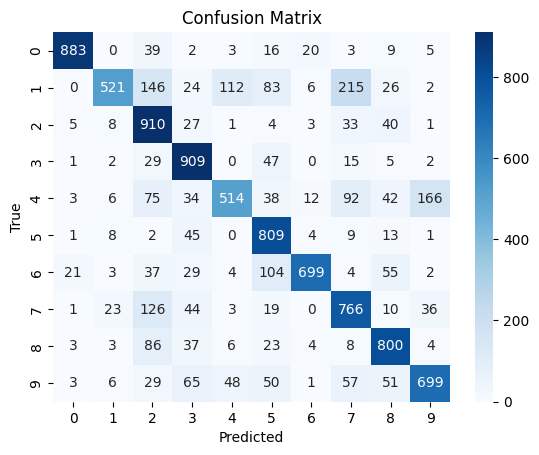

In [170]:
import sklearn.metrics
import seaborn as sn

# Tạo confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test2, y_hat4)

# Vẽ confusion matrix
plt.figure()
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Accuracy**

In [171]:
from sklearn.metrics import accuracy_score
accuracy4 = accuracy_score(y_test2, y_hat4)
print('Accuracy:', accuracy4)

Accuracy: 0.751


**Từ đây ta thấy rằng khi ta train dữ liệu không có nhiễu để dự đoán dữ liệu có 2 đường thẳng nhiễu thì độ chính xác ra kết quả 75%**

Từ bài lab ta thấy rằng khi ta train dữ liệu có nhiễu để dự đoán dữ liệu không có nhiễu thì độ chính xác ra kết quả tiệm cận 100% (không khả thi), trong khi đó khi ta train dữ liệu không có nhiễu để dự đoán dữ liệu có 1 hoặc 2 đường thẳng nhiễu thì độ chính xác ra kết quả thấp hơn (trong khoảng 80% ± 5% khả thi)